# Trabajo práctico N°2



1.   Realizar un modelo de regresión simple lineal ó regresión multivariante lineal. Para esto deben escalar los datos, separarlos, entrenar y evaluar.
2.   Realizar un modelo de regresión con SVR o DT. Para esto deben escalar los datos, separarlos, entrenar y evaluar.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statsmodels.api as sm



> # **Modelo de regresion lineal simple**




# 1. Importamos el dataset

In [ ]:
!wget https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

--2022-09-06 14:24:43--  https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘insurance.csv.1’

insurance.csv.1         [ <=>                ] 600.03K  --.-KB/s    in 0.04s   

2022-09-06 14:24:45 (15.1 MB/s) - ‘insurance.csv.1’ saved [614433]



In [ ]:
data = pd.read_csv('insurance.csv')


In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Eliminamos variables no numéricas

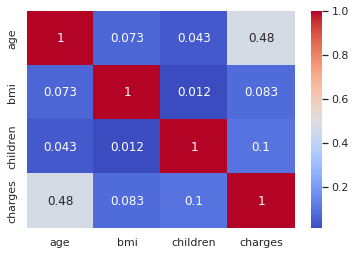

In [ ]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True)

# 3. Elegimos las variables

In [ ]:
X = data['age'].to_numpy()
y = data['bmi'].to_numpy()

# 4. Analizamos el dataset 

**Se analiza:** Normalidad de los datos, como se distribuyen y la correlacion.

In [ ]:
# Calculamos la normalidad usando el test de Shapiro-Wilk

from scipy.stats import shapiro
normalidad_X = shapiro(X) #evaluamos normalidad de los datos de X
normalidad_y = shapiro(y) #evaluamos normalidad de los datos de y

print(f"Normalidad de X: {normalidad_X}")
print(f"Normalidad de y: {normalidad_y}")

Normalidad de X: ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
Normalidad de y: ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)


El p-value es < 0.05 por lo cual se rechaza la hipotesis nula (H0) de que se distribuyen de forma normal.

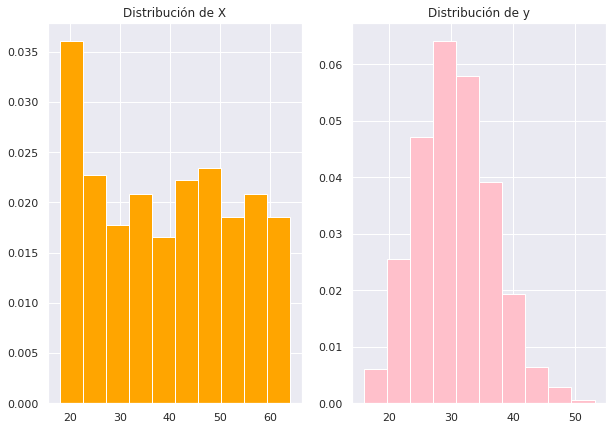

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.hist(X,color='orange',density=True)
plt.title("Distribución de X")
plt.subplot(1,2,2)
plt.hist(y,color='pink',density=True)
plt.title("Distribución de y");

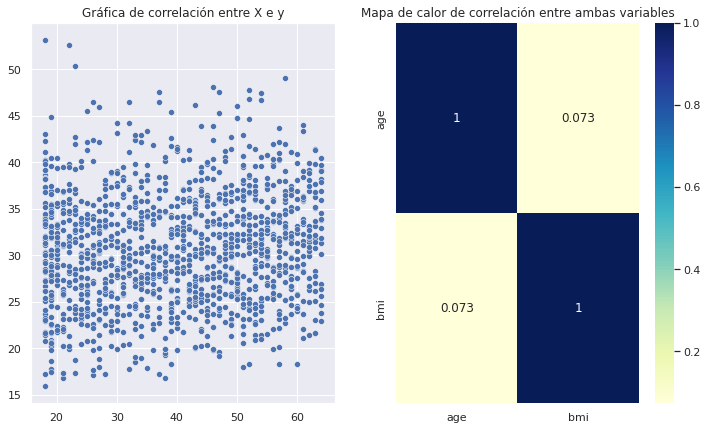

In [ ]:
# Analizamos si se correlacionan a traves de una grafica de scatter plot o un mapa de calor
# Como vimos arriba que no se distribuyen de forma normal, tenemos que hacer un test de correlacion de Kendall
sns.set()

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.scatterplot(x=X, y=y, )
plt.title("Gráfica de correlación entre X e y")
plt.subplot(1,2,2)
sns.heatmap(data[["age","bmi"]].corr(method='kendall'), cmap='YlGnBu', annot=True)
plt.title("Mapa de calor de correlación entre ambas variables");

En el scatterplot podemos ver que no tienen una orientacion lineal. El mapa de calor nos muestra que el valor de correlacion entre las variables es de 0.073, el cual es muy bajo, eso quiere decir que no hay una buena correlacion directamente proporcional.

# 5. Separamos el dataset en entrenamiento y testeo 

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Vemos las especificaciones de cada conjunto de datos formados 
print(f"Xtrain shape: {Xtrain.shape} | ytrain shape {ytrain.shape}")
print(f"Xtest shape: {Xtest.shape} | ytest shape {ytest.shape}")

Xtrain shape: (1003,) | ytrain shape (1003,)
Xtest shape: (335,) | ytest shape (335,)


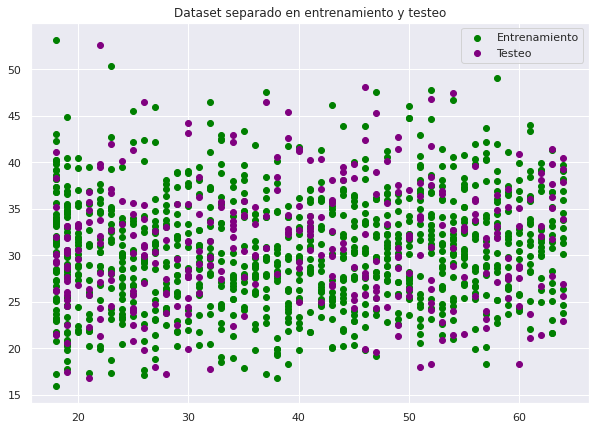

In [ ]:
# Grafico de como queda el dataset separado en entrenamiento y testeo 
plt.figure(figsize=(10,7))
plt.scatter(Xtrain,ytrain,c='green',label='Entrenamiento')
plt.scatter(Xtest,ytest,c='purple',label='Testeo')
plt.legend()
plt.title("Dataset separado en entrenamiento y testeo");

# 6. Entrenamos el modelo de regresión lineal simple 

In [ ]:
#Para entrenar la regresion usamos el parámetro normalize=True, para que normalice [0,1] los datos
# Entrenamos el modelo con la función .fit()
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True) 
linear_model.fit(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
#Vemos el coefficiente e intercepto que "aprendió" el modelo que mejor se ajustan a la relación lineal
print(f"Coeficiente que acompaña a la variable de entrada: {linear_model.coef_}")
print(f"Intercepto que corta al eje de ordenadas: {linear_model.intercept_}")

Coeficiente que acompaña a la variable de entrada: [[0.04768185]]
Intercepto que corta al eje de ordenadas: [28.64001759]


Entonces el modelo final quedaría algo así:

**y = 0.04768185*X0 + 28.6400175**

# 7. Evaluamos el modelo lineal entrenado 

In [ ]:
print(f"Valor de métrica R2 con el conjunto de entrenamiento: {linear_model.score(Xtrain.reshape(-1, 1),ytrain.reshape(-1, 1))}")
print(f"Valor de métrica R2 con el conjunto de testeo: {linear_model.score(Xtest.reshape(-1, 1),ytest.reshape(-1, 1))}")

Valor de métrica R2 con el conjunto de entrenamiento: 0.012393305915668451
Valor de métrica R2 con el conjunto de testeo: 0.001557360482753234


In [ ]:
#Calculamos predicciones para el conjunto de testeo y entrenamiento con la función .predict()
y_test_pred = linear_model.predict(Xtest.reshape(-1, 1)).squeeze() 
y_train_pred = linear_model.predict(Xtrain.reshape(-1, 1)).squeeze() 
y_test_pred.shape, y_train_pred.shape

((335,), (1003,))

In [ ]:
#Comparamos los valores predichos vs originales del conjunto de testeo y entrenamiento
from sklearn import metrics as ms 
test_mae = ms.mean_absolute_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mae entre ytest vs y_test_pred
train_mae = ms.mean_absolute_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mae entre ytrain vs y_train_pred
test_mse = ms.mean_squared_error(y_true = ytest, y_pred = y_test_pred) #Calculamos el mse entre ytest vs y_test_pred
train_mse = ms.mean_squared_error(y_true = ytrain, y_pred = y_train_pred) #Calculamos el mse entre ytrain vs y_train_pred
print(f"Valor de métrica MAE con el conjunto de testeo: {test_mae}")
print(f"Valor de métrica MAE con el conjunto de entrenamiento: {train_mae}\n")
print(f"Valor de métrica MSE con el conjunto de testeo: {test_mse}")
print(f"Valor de métrica MSE con el conjunto de entrenamiento: {train_mse}")

Valor de métrica MAE con el conjunto de testeo: 5.043528201929191
Valor de métrica MAE con el conjunto de entrenamiento: 4.795776790873554

Valor de métrica MSE con el conjunto de testeo: 39.932773379922494
Valor de métrica MSE con el conjunto de entrenamiento: 35.67373816117116


In [ ]:
# Como sabemos que los valores estan bien, para eso podemos ver cual es el valor promedio, maximo y minimo de conjunto de datos
print(f"Price maximo: {y.max()} | Price minimo: {y.min()} | Price promedio: {y.mean()} | Varianza de los datos de entrada X: {X.var()}")

Price maximo: 53.13 | Price minimo: 15.96 | Price promedio: 30.66339686098655 | Varianza de los datos de entrada X: 197.2538519888909


In [ ]:
error = [] #creamos una lista para guardar todos los datos obtenidos en el bucle for
for i,j in zip(ytest,y_test_pred):
  print(f"{i} vs {j:.2f} --> diferencia = {(i-j):.2f} --> error: {(int(i-j)/i)*100:.2f}%")
  error.append(abs((int(i-j)/i)*100))

25.175 vs 30.79 --> diferencia = -5.61 --> error: -19.86%
30.02 vs 30.36 --> diferencia = -0.34 --> error: 0.00%
26.885 vs 31.69 --> diferencia = -4.81 --> error: -14.88%
25.745 vs 30.83 --> diferencia = -5.09 --> error: -19.42%
31.92 vs 29.55 --> diferencia = 2.37 --> error: 6.27%
42.9 vs 30.26 --> diferencia = 12.64 --> error: 27.97%
22.515 vs 29.55 --> diferencia = -7.03 --> error: -31.09%
37.905 vs 31.69 --> diferencia = 6.21 --> error: 15.83%
17.29 vs 29.98 --> diferencia = -12.69 --> error: -69.40%
28.69 vs 30.98 --> diferencia = -2.29 --> error: -6.97%
24.4 vs 30.07 --> diferencia = -5.67 --> error: -20.49%
30.59 vs 30.59 --> diferencia = -0.00 --> error: 0.00%
29.59 vs 30.02 --> diferencia = -0.43 --> error: 0.00%
42.35 vs 30.83 --> diferencia = 11.52 --> error: 25.97%
40.92 vs 31.50 --> diferencia = 9.42 --> error: 21.99%
38.94 vs 30.88 --> diferencia = 8.06 --> error: 20.54%
42.68 vs 30.98 --> diferencia = 11.70 --> error: 25.77%
36.63 vs 30.88 --> diferencia = 5.75 --> error

In [ ]:
print(f"El error promedio de las predicciones con el conjunto de testeo es: {sum(error)/len(error):.2f}%")

El error promedio de las predicciones con el conjunto de testeo es: 15.40%


> # **Modelo de Support vector regressor**

In [ ]:
!wget https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv
data = pd.read_csv('insurance.csv')

In [ ]:
from scipy.stats import shapiro
for i in data.drop(columns=['sex', 'smoker', 'region']):
  print(i, '->', shapiro(data[i]))

age -> ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
bmi -> ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)
children -> ShapiroResult(statistic=0.8231803774833679, pvalue=5.066361280494088e-36)
charges -> ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)


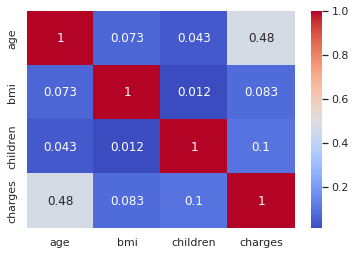

In [ ]:
sns.heatmap(data.drop(columns=['sex', 'smoker', 'region']).corr(method='kendall'), cmap='coolwarm', annot=True) # Metodo de kendall 

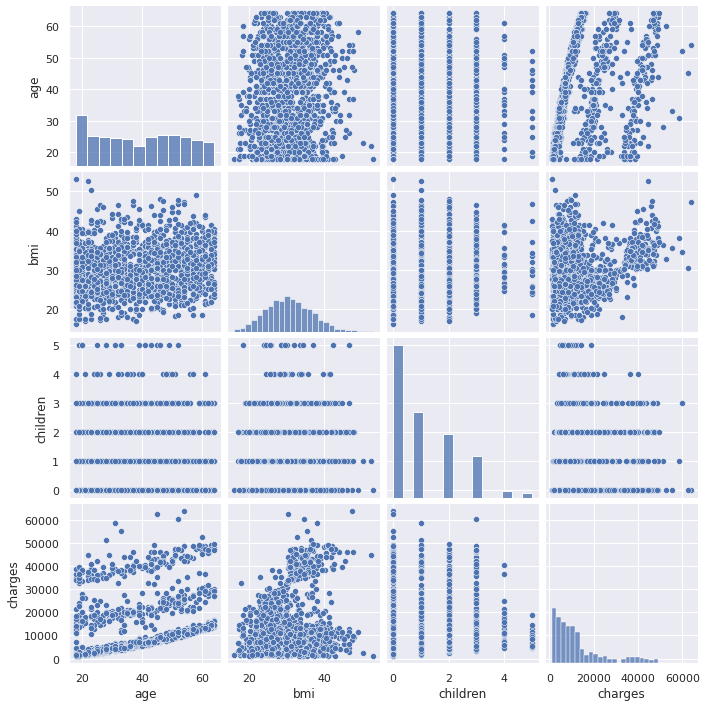

In [ ]:
sns.pairplot(data.drop(columns=['sex', 'smoker', 'region']));

# 1. Aplicamos modelos de regresión lineal multiple con OLS

In [ ]:
#usamos el import de statsmodels.api, tambien se puede hacer con sklearn.linear_model -> LinearRegression
X = data[['charges', 'children', 'bmi']].to_numpy()
y = data['age'].to_numpy()
ols_model = sm.OLS(y,X).fit()
ols_model.rsquared_adj,ols_model.aic,ols_model.bic

(0.8762372366538986, 10983.87017796512, 10999.466971687185)

In [ ]:
from sklearn.svm import SVR
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
  svr = SVR(kernel='rbf', C=i, epsilon=0.8)
  svr.fit(X, y)
  print(f"R2 con parametro C={i}, score={svr.score(X, y)}")

R2 con parametro C=0.5, score=0.4490375055864697
R2 con parametro C=1, score=0.46693969745574226
R2 con parametro C=2, score=0.4831015145229054
R2 con parametro C=3, score=0.48963259656678393
R2 con parametro C=4, score=0.49457853015451847
R2 con parametro C=5, score=0.49654814892139354
R2 con parametro C=6, score=0.5008919484951302
R2 con parametro C=7, score=0.504670832831461
R2 con parametro C=8, score=0.5060369743362032
R2 con parametro C=9, score=0.5086419618292461
R2 con parametro C=10, score=0.5122003741434527
